In [1]:
import numpy as np
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt

In [2]:
'''inputs the data from the user and returns the X and y values'''
def input_data(s):
    print("uploading a  csv file that is appropriate for logistc regression.......")

    X=pd.read_csv(s,header=None)   #load the training data

    # n=int(input("enter the number of features....."))

    X=X.to_numpy()    #converting to numpy
    i=len(X[0])       #finding the number of features
    m=X[:,0].size   
    y=X[:,0].reshape((m,1))
    X=np.delete(X,0,axis=1) 
    n=i                     #n is number of features
#     mean=np.mean(X,axis=1).reshape((m,1))
#     std=np.std(X,axis=1).reshape((m,1))
#     X=(X-mean)/std
    u=np.ones((m,1))            #vector of ones then p.
    # mean=np.mean(X,axis=1).reshape((m,1))
    # std=np.std(X,axis=1).reshape((m,1))
    X=X/255
#     X=np.concatenate((u,X),axis=1)
#     print(X)
    return X,y

'''gives the gradinet of the sigmoid'''    
def siggrad(z):
    g=np.zeros((z.shape))
    g=sigmoid(z)*(1-sigmoid(z))
    return g

'''convers the vector into matrix of binary used for the multiclass classification'''
def vector_to_matrix_of_zeros_and_ones(vect, classes):
    m=vect.size
    Y=np.zeros((m,classes))
    flag=0
    for i in vect:
        Y[flag][i-1]=1
        flag+=1
    
    return Y 

'''returns the sigmoid'''
def sigmoid (input):
    return 1/(1+np.exp(-input))

In [13]:
def back_prop(X_train,Y):  
    alpha=0.6
    m=X_train.shape[0]
      #paramaters
    theta1=np.random.rand(524,X_train.shape[1])-0.5  
    bias1=np.random.rand(524,1)-0.5
    theta2=np.random.rand(300,524)-0.5
    bias2=np.random.rand(300,1)-0.5
    theta3=np.random.rand(26,300)-0.5
    bias3=np.random.rand(26,1)-0.5

    for i in range(1500):
       #forward propagation
        Z2 = theta1@(X_train.T) + bias1
        A2 = sigmoid(Z2)
        Z3 = theta2@(A2) + bias2
        A3 = sigmoid(Z3)
        Z4 = theta3@(A3) + bias3
        h_x = sigmoid(Z4)
    
    #back propagation
        dZ4 = h_x - Y.T
        dtheta3 = dZ4@(A3.T)
        dbias3 = np.sum(dZ4)
        dZ3 = ((theta3.T)@(dZ4))*(siggrad(A3))
        dtheta2 = dZ3@(A2.T)
        dbias2 = np.sum(dZ3)
        dZ2 = ((theta2.T)@(dZ3))*(siggrad(A2))
        dtheta1 = dZ2@(X_train)
        dbias1  = np.sum(dZ2)
 

        #updating parameters
        theta1 -= (alpha/m)*(dtheta1)
        bias1 -= (alpha/m)*(dbias1)    
        theta2 -= (alpha/m)*(dtheta2)  
        bias2 -= (alpha/m)*(dbias2)  
        theta3 -= (alpha/m)*(dtheta3)
        bias3 -= (alpha/m)*(dbias3)
    
        cost=(-1/m)*(np.sum(Y.T*(np.log(h_x)) + (1-Y.T)*(np.log(1-h_x))))  #cost function of logistic function
        plt.scatter(i,cost)
#         if i%10==0:
        print(cost)
    return (theta1,bias1,theta2,bias2,theta3,bias3)

In [8]:
X_train,y_train=input_data('emnist-letters-train.csv')

uploading a  csv file that is appropriate for logistc regression.......


In [9]:
Y=vector_to_matrix_of_zeros_and_ones(y_train,26)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

27.656813121243832
24.54975142824019
7.162784227957639
5.47757586100525
5.038271615056685
4.696799523983643
4.467885509350006
4.345118592701482
4.295062822813695
4.279640903978811
4.2758648081782
4.275064907414155
4.274892846126401
4.274802337782445
4.274575364897411
4.2738045161379725
4.271463397238445
4.265738490532444
4.254934744925692
4.2385631169988605
4.220707979556304
4.208211662428872
4.200268468006474
4.194536290492846
4.19015213104116
4.1866894881705745
4.183862302476441
4.181458430690208
4.179321627410961
4.177340248032239
4.175430944919666
4.17352258643668
4.171548964337841
4.169454192403298
4.16720452656822
4.164795577529807
4.162249655821169
4.159606111319136
4.15690963440216
4.15420006056565
4.15150589377602
4.148842319124746
4.146212875491411
4.143613020895492
4.141033924262294
4.138465494182591
4.135898339598475
4.13332477278057
4.1307391092216195
4.128137524325698
4.125517686872186
4.122878318890147
4.120218761364777
4.117538590389162
4.114837301331598
4.1121140588371

C:\Users\Keshava Bhat S\AppData\Local\Temp\ipykernel_20340\2424987966.py:45: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-input))


3.853644092053766
3.852568621221038
3.8514962808176434
3.85042694917335
3.8493604032947326
3.8482959866808923
3.847232587972172
3.846169081991422
3.8451050591319813
3.8440413015688715
3.84297917824553
3.841919301938685
3.8408611251806626
3.8398036562919997
3.838746266471211
3.8376891538931046
3.8366331139404815
3.8355787782120188
3.8345263322649075
3.8334759435367545
3.832427932954743
3.8313824425161855
3.8303391748442652
3.829297609555445
3.828257397058444
3.827218503012704
3.8261810840112744
3.8251452431222286
3.824110906215208
3.823077869174406
3.8220458587412964
3.821014476115608
3.819983313847169
3.8189524032969815
3.817922264276337
3.8168932792171724
3.815865098098687
3.8148370225753543
3.813808701380668
3.812779987689318
3.811750511900366
3.810720009229157
3.809688650646664
3.8086568616661562
3.8076249891820964
3.806593098992549
3.805561004071243
3.804528691454004
3.8034966835575115
3.802465869039746
3.801437285016671
3.800412365025488
3.799392844236512
3.798379836370315
3.79737

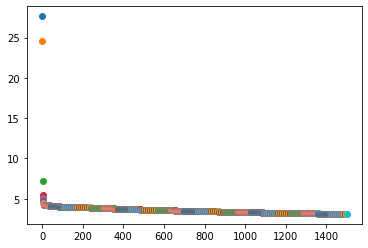

In [14]:
theta1,bias1,theta2,bias2,theta3,bias3=back_prop(X_train,Y)

In [15]:
def predict(X,theta1,theta2,theta3,bias1,bias2,bias3):
    Z2 = theta1@(X.T) + bias1
    A2 = sigmoid(Z2)
    Z3 = theta2@(A2) + bias2
    A3 = sigmoid(Z3)
    Z4 = theta3@(A3) + bias3
    y_pred= sigmoid(Z4)
    y_pred= (y_pred.T)
    answer=convert_matrix_into_VECTOR(y_pred)
    return answer
    
def convert_matrix_into_VECTOR(h_x):
    m,k = h_x.shape
    h = np.zeros((m,1))
    for i in range(m):
        a_sliced = h_x[i]
        index = np.where(a_sliced == np.amax(a_sliced))[0]
        h[i] = index+1
            
    return h

In [16]:
y_predi=predict(X_train,theta1,theta2,theta3,bias1,bias2,bias3)

C:\Users\Keshava Bhat S\AppData\Local\Temp\ipykernel_20340\2424987966.py:45: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-input))


In [17]:
y_predi

array([[18.],
       [17.],
       [16.],
       ...,
       [18.],
       [23.],
       [12.]])

In [18]:
'''lastly this fucntion is used to define the accuracy of the prediction'''
def accuracy(h,y):
    m=y.size
    count=0
    for i in range(m):
        if( h[i]==y[i]):
            count+=1
    accu=(count/m)*100
    return accu

In [19]:
accuracy(y_predi,y_train)

33.318693693693696

In [20]:
X_train.shape

(88800, 784)

In [25]:
X_test,Y_test=input_data('emnist-letters-test.csv')
y_predi=predict(X_test,theta1,theta2,theta3,bias1,bias2,bias3)

uploading a  csv file that is appropriate for logistc regression.......


C:\Users\Keshava Bhat S\AppData\Local\Temp\ipykernel_20340\2424987966.py:45: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-input))


In [26]:
y_predi

array([[18.],
       [ 8.],
       [ 3.],
       ...,
       [19.],
       [10.],
       [12.]])

In [27]:
accuracy(y_predi,Y_test)

35.03378378378378